<a href="https://colab.research.google.com/github/YanGermanoSantos/Analise_Dados_PRF/blob/main/Analise_PRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise da Principal Causa de Acidentea nas Estradas Brasileiras (PRF)**

O objetivo central desta análise é compreender a **causa predominante de acidentes nas estradas brasileiras** e explorar os cenários propensos a esses incidentes. Nosso foco reside em identificar padrões e tendências que nos permitam aprofundar nosso conhecimento sobre os fatores subjacentes aos acidentes rodoviários no Brasil.

* **Identificar a Principal Causa de Acidentes:** Analisaremos os dados para determinar a causa mais frequente de acidentes nas estradas brasileiras, proporcionando uma compreensão mais clara dos desafios enfrentados em termos de segurança viária.

* **Explorar Cenários de Risco:** Investigaremos os cenários e condições em que esses acidentes são mais propensos a ocorrer. Isso nos ajudará a delinear áreas críticas que requerem medidas preventivas.

* **Aprimorar a Segurança Viária:** Com base nas conclusões, buscaremos recomendações para aprimorar a segurança nas estradas, concentrando-nos em estratégias direcionadas para mitigar a causa principal de acidentes e prevenir incidentes em cenários de alto risco.


<center><img alt="Estrada" width="50%" src="https://img.freepik.com/free-photo/city_1127-4057.jpg?w=1380&t=st=1695751965~exp=1695752565~hmac=3d616182d4269ba512327b8cc00df209858b14158512cf5ceff5ef55f18409c7"></center>


# Polícia Rodoviária Federal (PRF)

A **Polícia Rodoviária Federal (PRF)** é uma instituição policial brasileira responsável por garantir a segurança e fiscalizar as rodovias federais do país.

<center><img alt="Estrada" width="10%" src="https://seeklogo.com/images/P/policia-rodoviaria-federal-logo-C6C9F2F58E-seeklogo.com.png"></center>

Fundada em 1928, a PRF desempenha um papel crucial na manutenção da ordem e da segurança viária nas estradas, contribuindo para a **prevenção de acidentes**, o **combate ao crime** nas rodovias e a promoção da **fluidez do tráfego**.

Seus agentes são treinados para atuar em diversas situações, desde o **controle de tráfego** até a **fiscalização de veículos** e o apoio a motoristas em **situações de emergência**. A PRF desempenha um papel fundamental na garantia da **mobilidade** e da **segurança de todos que utilizam as rodovias federais no Brasil**.



## 1 - Obtenção dos dados
Dados coletados a partir da [base pública da PRF](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf) (Polícia Rodoviária Federal)  e abrangem o período de janeiro a julho de 2023. Esta base é uma fonte oficial e pública que contém registros de acidentes de trânsito ocorridos em rodovias de todo o Brasil durante esse intervalo de tempo. Essas informações são cruciais para nossa análise, permitindo-nos compreender e tomar decisões informadas sobre a segurança nas estradas.

In [1]:
# Importando pacotes necessarios
import pandas as pd
import seaborn as sns
import calendar
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
%matplotlib inline

df_prf = pd.read_csv('/content/datatran2023.csv', sep = ';', encoding = 'ISO-8859-1')

**Dicionário das variáveis**

* `id` - Número de identificação único para cada registro no conjunto de dados.
* `data_inversa` - Data do acidente no formato AAAAMMDD (exemplo: 2023-03-13).
* `dia_semana` - Dia da semana em que o acidente ocorreu (exemplo: segunda-feira).
* `horario` - Hora do acidente no formato HH:MM:SS (exemplo: 18:10:00).
* `uf` - Unidade Federativa onde o acidente ocorreu (exemplo: ES - Espírito Santo).
* `br` - Número da rodovia onde o acidente ocorreu (exemplo: 101.0).
* `km` - Quilômetro exato da rodovia onde o acidente ocorreu (exemplo: 293,6).
* `municipio` - Município onde o acidente ocorreu (exemplo: CARIACICA).
* `causa_acidente` - Causa principal do acidente (exemplo: Ausência de sinalização).
* `tipo_acidente` - Tipo de acidente (exemplo: Atropelamento de Pedestre).
* `classificacao_acidente` - Classificação do acidente (exemplo: Com Vítimas Feridas).
* `fase_dia` - Fase do dia em que o acidente ocorreu (exemplo: Anoitecer).
* `sentido_via` - Sentido da via no momento do acidente (exemplo: Crescente).
* `condicao_metereologica` - Condição meteorológica no momento do acidente (exemplo: Céu Claro).
* `tipo_pista` - Tipo de pista (exemplo: Múltipla).
* `tracado_via` - Traçado da via no momento do acidente (exemplo: Reta).
* `uso_solo` - Se a área onde o acidente ocorreu é utilizada para fins agrícolas ou não (exemplo: Sim).
* `pessoas` - Número total de pessoas envolvidas no acidente (exemplo: 2).
* `mortos` - Número de pessoas mortas no acidente (exemplo: 0).
* `feridos_leves` - Número de pessoas com ferimentos leves no acidente (exemplo: 0).
* `feridos_graves` - Número de pessoas com ferimentos graves no acidente (exemplo: 1).
* `ilesos` - Número de pessoas ilesas no acidente (exemplo: 1).
* `ignorados` - Número de pessoas cujo estado não foi informado no acidente (exemplo: 0).
* `feridos` - Número total de pessoas feridas no acidente (exemplo: 1).
* `veiculos` - Número total de veículos envolvidos no acidente (exemplo: 1).
* `latitude` - Coordenada de latitude do local do acidente (exemplo: -20.324159).
* `longitude` - Coordenada de longitude do local do acidente (exemplo: -40.395290).
* `regional` - Regional de tráfego onde o acidente ocorreu (exemplo: SPRF-ES).
* `delegacia` - Delegacia responsável pelo registro do acidente (exemplo: DEL01-ES).
* `uop` - Unidade Operacional da Polícia Rodoviária responsável pelo atendimento do acidente (exemplo: UOP01-DEL01-ES).

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras e últimas entradas.

In [2]:
# 5 primeiras linhas
df_prf.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [3]:
# 5 úlitmas linhas
df_prf.tail()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
38403,541876,2023-03-13,segunda-feira,18:10:00,ES,101.0,"293,6",CARIACICA,Ausência de sinalização,Atropelamento de Pedestre,...,1,1,0,1,1,"-20,32415948","-40,3952903",SPRF-ES,DEL01-ES,UOP01-DEL01-ES
38404,542057,2023-07-29,sábado,10:00:00,GO,60.0,"164,8",GOIANIA,Velocidade Incompatível,Colisão traseira,...,0,2,0,0,2,"-16,7036","-49,342",SPRF-GO,DEL01-GO,UOP02-DEL01-GO
38405,542058,2023-07-08,sábado,18:50:00,PR,116.0,1,CAMPINA GRANDE DO SUL,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,4,1,"-25,06368403","-48,57051896",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
38406,542112,2023-06-22,quinta-feira,05:25:00,MG,381.0,"746,5",TRES CORACOES,Condutor Dormindo,Saída de leito carroçável,...,0,53,0,1,1,"-21,618761","-45,262445",SPRF-MG,DEL16-MG,UOP02-DEL16-MG
38407,542243,2023-07-16,domingo,18:40:00,MG,40.0,510,RIBEIRAO DAS NEVES,Trafegar com motocicleta (ou similar) entre as...,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-19,77463885","-44,12321882",SPRF-MG,DEL01-MG,UOP02-DEL01-MG


## 2 - Preparação dos dados

 Nesta etapa de Preparação dos Dados, nosso objetivo é **garantir que os dados estejam limpos**, sem valores ausentes ou inconsistentes, e transformar as colunas para o formato correto. Isso nos permite ter informações confiáveis para nossa análise.

### 2.1 - Metadados

In [4]:
# Construindo função para obter metadados
def metadados(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [5]:
# Obtendo metadados
metadados_prf = metadados(df_prf)
metadados_prf.head(100)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,tracado_via,object,0,0.00,10
1,fase_dia,object,0,0.00,4
2,delegacia,object,362,0.94,146
3,regional,object,3,0.01,28
4,longitude,object,0,0.00,23293
5,latitude,object,0,0.00,23298
6,uso_solo,object,0,0.00,2
7,data_inversa,object,0,0.00,212
8,tipo_pista,object,0,0.00,3
9,condicao_metereologica,object,0,0.00,9


* É importante observar que algumas colunas apresentam valores nulos, mas isso não é motivo de preocupação.
A coluna com a maior porcentagem de valores nulos é a `delegacia`, com apenas **0,50%** de registros ausentes.
Para lidar com esses valores nulos, categorizaremos os valores como "Desconhecido", dado que a quantidade é baixa
e a maioria desses valores é do tipo object (categórica).

* Em relação à variável `br`, que é do tipo float e contém valores nulos, optamos por substituir os valores nulos por 0,
considerando que não existe uma rodovia BR-0.

* Além disso, identificamos que as variáveis `longitude` e `latitude` estão atualmente no formato de object (categórica),
mas para uma análise futura que envolve a criação de gráficos, é importante convertê-las para o tipo float.


#### 2.1.1 - Tratando nulos

Vamos tratar os valores nulos que mencionamos no tópico acima

In [6]:
# Substitiuindo nulos por "Desconhecido" para categóricas
var_categoricas = df_prf.select_dtypes(include=['object']).columns
df_prf[var_categoricas] = df_prf[var_categoricas].fillna('Desconhecido')

# Validando tratamento para variáveis categóricas
df_prf[var_categoricas].isnull().sum() / df_prf.shape[0] * 100

data_inversa              0.0
dia_semana                0.0
horario                   0.0
uf                        0.0
km                        0.0
municipio                 0.0
causa_acidente            0.0
tipo_acidente             0.0
classificacao_acidente    0.0
fase_dia                  0.0
sentido_via               0.0
condicao_metereologica    0.0
tipo_pista                0.0
tracado_via               0.0
uso_solo                  0.0
latitude                  0.0
longitude                 0.0
regional                  0.0
delegacia                 0.0
uop                       0.0
dtype: float64

In [7]:
# Substituindo nulos da variável br por 0
df_prf['br'].fillna(0, inplace=True)

# Validando tratamento para variáveis numéricas
df_prf['br'].isnull().sum() / df_prf.shape[0] * 100

0.0

#### 2.1.2 - Tratando tipos incorretos

* Alterar o tipo das variáveis `longitude` e `latitude`
para float, pois vamos utilizar essas variaveis futuramente para plotar gráficos

* Vamos alterar também o tipo da coluna `data_inversa` que se encontra como object, vamos alterar para datetime

In [8]:
# Alterando para float
df_prf['longitude'] = df_prf['longitude'].str.replace(',', '.').astype(float)
df_prf['latitude'] = df_prf['latitude'].str.replace(',', '.').astype(float)

# Verificando alteração
df_prf[['latitude', 'latitude']].dtypes

latitude    float64
latitude    float64
dtype: object

In [9]:
# Alterando para datetime
df_prf['data_inversa'] = pd.to_datetime(df_prf['data_inversa'], format='%Y-%m-%d')

# Verificando alteração
df_prf['data_inversa'].dtypes

dtype('<M8[ns]')

Com todos os dados tratados, estamos prontos para iniciar uma análise exploratória a fim de compreender melhor a distribuição dos nossos dados. Vamos avançar e explorar os **insights que podemos extrair dessa análise**.

## 3 - Análise Exploratória

### 3.1 - Entendendo a distribuição dos dados

#### 3.1.1 - Distribuições Numéricas

In [10]:
# Entendendo os dados numéricos
df_prf.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,38408.000000,38408.000000,38408.000000,38408.00000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000
mean,518493.765674,209.577302,2.471386,0.08355,0.875833,0.277364,1.078187,0.156452,1.153197,1.669965,-19.034662,-46.570301
std,12414.240821,129.786321,2.217474,0.32962,1.081697,0.615291,1.818274,0.439683,1.190245,0.724583,7.685399,6.147828
min,496506.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-33.588291,-69.503043
25%,507816.750000,101.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-25.307141,-50.423887
50%,518657.500000,153.000000,2.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-20.545990,-47.507048
75%,529239.500000,324.000000,3.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-12.914044,-42.568116
max,542243.000000,495.000000,73.000000,7.00000,61.000000,29.000000,61.000000,14.000000,62.000000,15.000000,4.383141,-34.828400


* **Quantidade de acidentes:** É possivel validar que só em 2023 de Janeiro até Julho já temos mais de 30 mil acidentes registrado

* **Mortalidade Baixa:** A média de mortos por acidente é baixa (cerca de 0,08), indica que a maioria dos acidentes não resulta em mortes.

* **Número de Pessoas Envolvidas:** A média de pessoas envolvidas em cada acidente é aproximadamente 2,47.

* **Feridos Leves e Graves:** A média de feridos leves é cerca de 0,88 e a de feridos graves é cerca de 0,28 por acidente. Isso indica que a maioria dos acidentes resulta em feridos leves ou nenhum ferido grave. No entanto, assim como com as mortes, existem casos extremos com um grande número de feridos.

* **Ilesos e Feridos:** A média de pessoas ilesas (1,08) é ligeiramente maior do que a média de feridos (1,15), sugerindo que, em média, mais pessoas saem ilesas de um acidente do que feridas.

* **Número de Veículos:** A média de veículos envolvidos em cada acidente é cerca de 1,67. Isso sugere que a maioria dos acidentes envolve um ou dois veículos.

Para uma compreensão mais aprofundada e visual desses valores, exploraremos suas distribuições por meio de histogramas e boxplots.

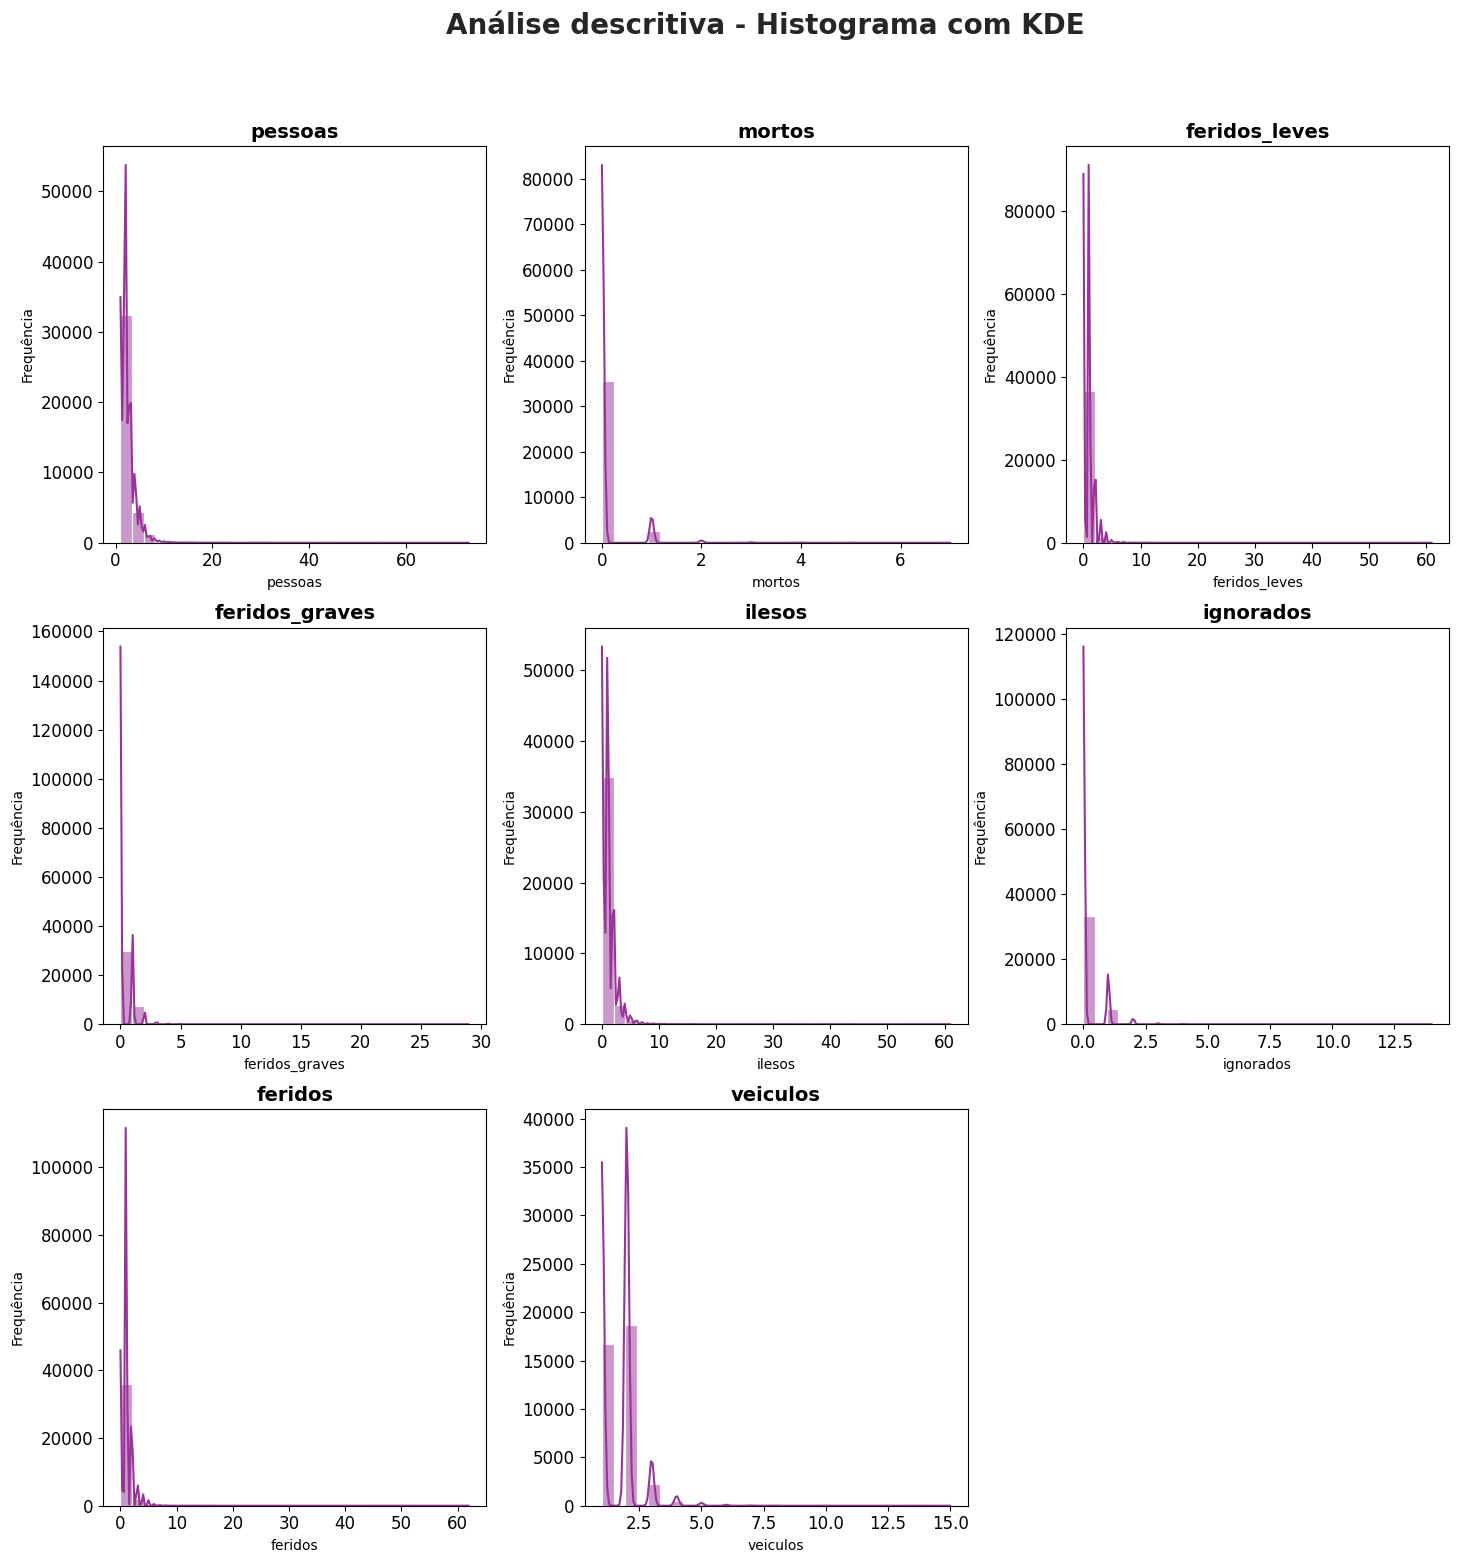

In [11]:
def analise_variaveis_hist(df):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param df: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=df[column], ax=axes[i//3, i%3], color="#993399", bins=30, kde=True)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

# Plotando os histogramas com KDE corrigidos em um painel usando a função definida
analise_variaveis_hist(df_prf[['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos']])


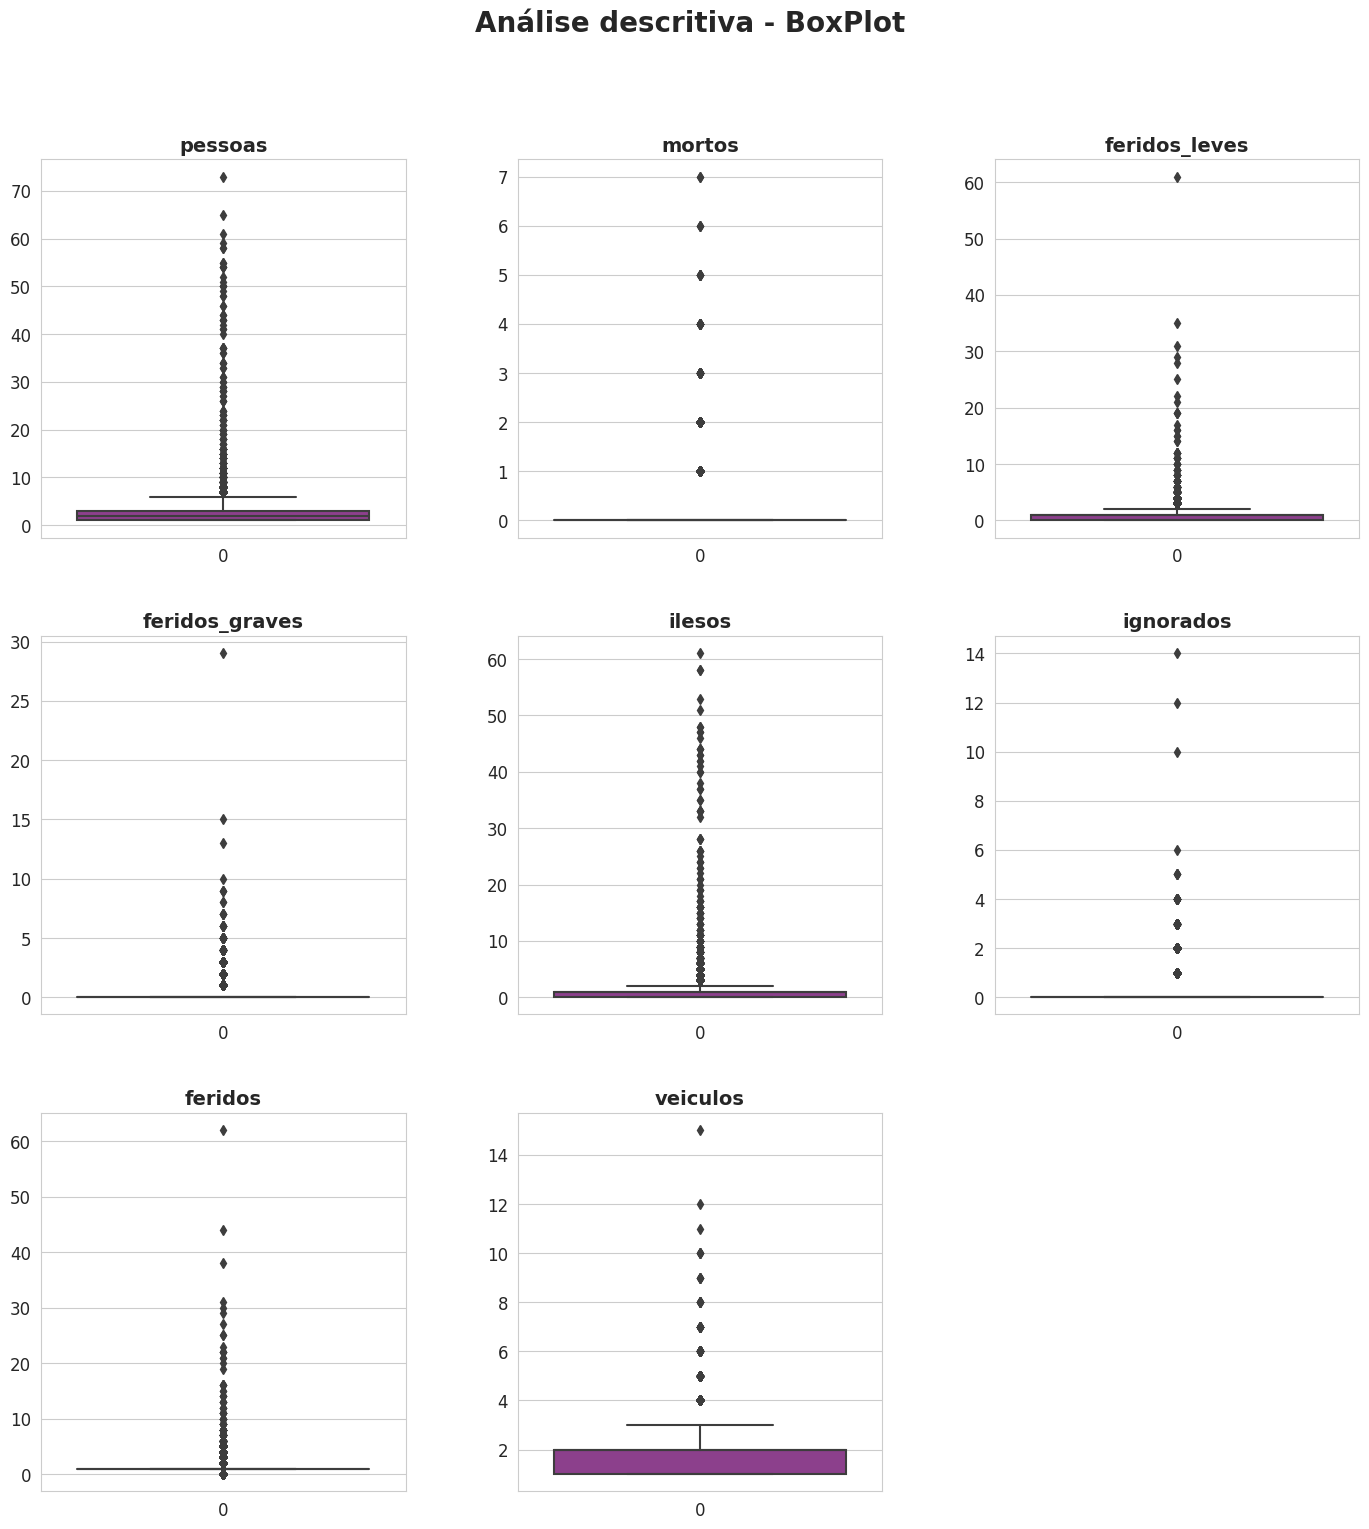

In [12]:
def analise_variaveis_boxplot(df):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param df: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=df[column], ax=axes[i//3, i%3], color="#993399")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
analise_variaveis_boxplot(df_prf[['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos']])

# Mostra os gráficos
plt.show()

**Variabilidade e Distribuição:**
* A maioria das variáveis tem a maioria dos valores concentrados perto de zero, sugerindo que a maioria dos acidentes envolve poucas pessoas ou não resulta em mortes ou ferimentos graves.

* A presença de outliers em algumas variáveis indica acidentes excepcionais com um grande número de pessoas envolvidas ou vítimas.

**Concentração de Dados:**
* A maioria dos acidentes não resultou em mortes ou ferimentos graves, conforme indicado pelas medianas próximas de zero para "mortos", "feridos_leves", "feridos_graves" e "ilesos".

**Amplitude dos Dados:**
* A variabilidade dos dados varia, com algumas variáveis tendo valores concentrados em uma faixa estreita (IQR pequeno) e outras apresentando maior variabilidade (IQR maior).

**Distribuição:**
* Histogramas confirmam que a maioria dos valores está concentrada perto de zero.

#### 3.1.2 Distribuições Categóricas

In [13]:
# Entendendo os dados categóricos
df_prf.describe(include = 'object')

,dia_semana,horario,uf,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,regional,delegacia,uop
count,38408,38408,38408,38408,38408,38408,38408,38408,38408,38408,38408,38408,38408,38408,38408,38408,38408
unique,7,1334,27,6468,1735,71,16,3,4,3,9,3,10,2,29,147,393
top,domingo,19:00:00,MG,2,BRASILIA,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,SPRF-MG,DEL01-PR,UOP01-DEL01-SP
freq,6503,552,5047,188,563,5550,7346,29350,20851,20800,24245,19043,21346,22335,5042,1337,643


In [14]:
def calculate_percentage(df, column_name, condition):
    """
    Calcula a porcentagem de linhas em um DataFrame que atendem a uma condição específica em uma coluna.

    Parâmetros:
    - df: DataFrame Pandas
        O DataFrame no qual deseja-se calcular a porcentagem.
    - column_name: str
        O nome da coluna na qual a condição será aplicada.
    - condition: valor
        A condição que se deseja verificar na coluna.

    Retorna:
    - percentage: float
        A porcentagem de linhas que atendem à condição especificada na coluna.
    """
    # Conta quantas vezes a condição ocorre na coluna especificada
    qtd = (df[column_name] == condition).sum()
    # Calcula a porcentagem de ocorrências da condição em relação ao total de linhas no DataFrame
    percentage = (df[column_name] == condition).sum() / df.shape[0] * 100
    return percentage

# Lista de tuplas contendo nomes de colunas e condições para calcular a porcentagem
conditions_columns = [
    ('uf', 'MG'),
    ('causa_acidente', 'Reação tardia ou ineficiente do condutor'),
    ('dia_semana', 'domingo'),
    ('tipo_acidente', 'Colisão traseira'),
    ('classificacao_acidente', 'Com Vítimas Feridas'),
    ('condicao_metereologica', 'Céu Claro')
]

# Dicionário para armazenar os resultados das porcentagens
percentage_results = {}

# Loop para calcular a porcentagem para cada par de coluna e condição
for column_name, condition in conditions_columns:
    percentage = calculate_percentage(df_prf, column_name, condition)
    percentage_results[f'{column_name} {condition}'] = percentage

# Loop para imprimir os resultados
for key, value in percentage_results.items():
    print(f'{key}: {value:.2f}%')  # Imprime o nome da coluna e condição junto com a porcentagem formatada

uf MG: 13.14%
causa_acidente Reação tardia ou ineficiente do condutor: 14.45%
dia_semana domingo: 16.93%
tipo_acidente Colisão traseira: 19.13%
classificacao_acidente Com Vítimas Feridas: 76.42%
condicao_metereologica Céu Claro: 63.12%


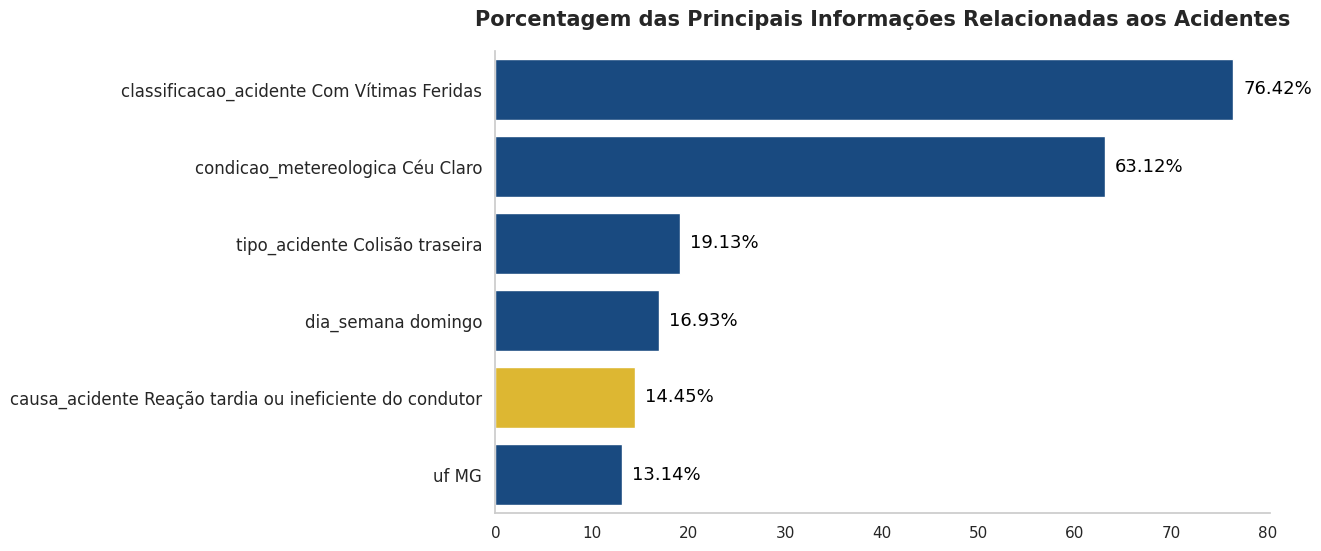

In [15]:
# Classifica os resultados em ordem decrescente
sorted_results = dict(sorted(percentage_results.items(), key=lambda item: item[1], reverse=True))

# Obtém as chaves (nomes das colunas) e os valores (porcentagens) ordenados
keys = list(sorted_results.keys())
values = list(sorted_results.values())

# Configura o estilo Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Cria uma lista de cores para as barras, definindo a cor desejada para o quinto item
colors = ['#084991' if i != 4 else '#FAC715' for i in range(len(keys))]

# Usa a lista de cores para as barras no gráfico de barras
bars = sns.barplot(x=values, y=keys, palette=colors)

# Adiciona as porcentagens nas barras
for bar, value in zip(bars.patches, values):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{value:.2f}%', va='center', color='black', fontsize=13)

# Configurações adicionais do gráfico
plt.title('Porcentagem das Principais Informações Relacionadas aos Acidentes', fontweight='bold', fontsize=15, pad=18)
plt.yticks(fontsize=12)
plt.gca().set_axisbelow(True)
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


Neste estágio da análise, podemos afirmar com confiança que, entre os temas mais recorrentes na base de dados, já encontramos uma resposta definitiva para nossa pergunta:

- A causa de acidente mais prevalente é **"Reação tardia ou ineficiência do condutor"**.

Agora, para uma validação abrangente, podemos listar todas as causas de acidentes e representá-las graficamente para uma visão mais clara e completa.

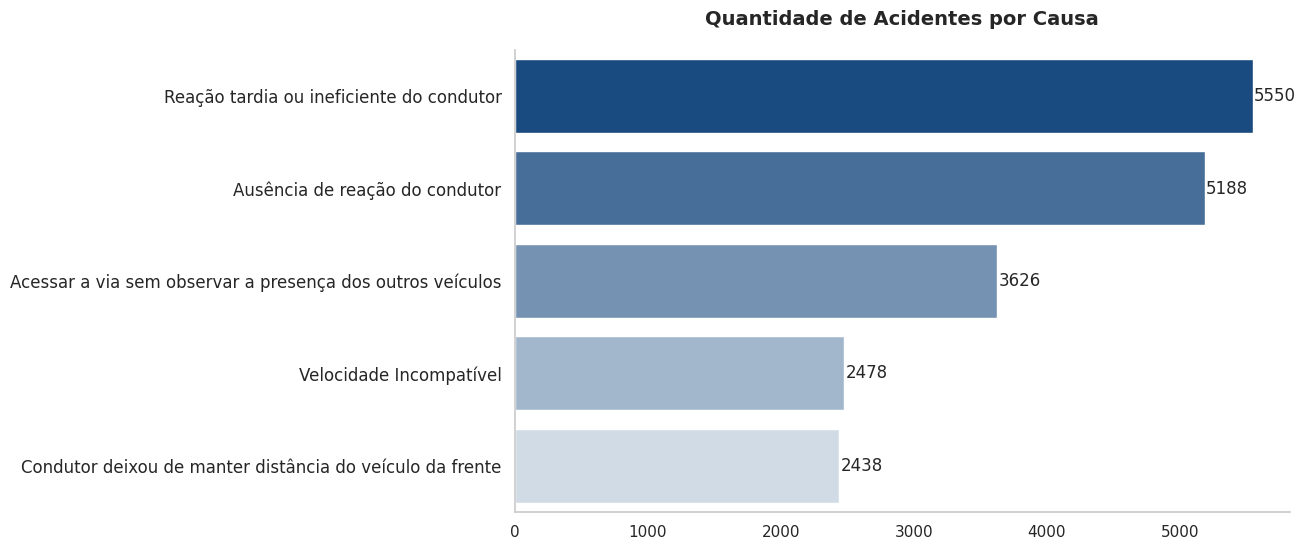

In [16]:
# Realiza a contagem das causas de acidentes
causa_grafico = df_prf['causa_acidente'].value_counts().reset_index().rename(columns={'index': 'causa_acidente', 'causa_acidente': 'quantidade_acidentes'}).sort_values(by='quantidade_acidentes', ascending=False).head()

# Configura o gráfico
plt.figure(figsize=(10, 6))

# Define uma paleta de cores personalizada
custom_palette = sns.blend_palette(['#084991', '#FFFFFF'])

# Cria o gráfico de barras
ax = sns.barplot(x='quantidade_acidentes', y='causa_acidente', data=causa_grafico, palette=custom_palette)

# Configurações adicionais do gráfico
plt.title('Quantidade de Acidentes por Causa', fontweight='bold', fontsize=14, pad=18)
plt.yticks(fontsize=12)
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Remove os rótulos nos eixos x e y
ax.set_xlabel('')
ax.set_ylabel('')

# Adiciona os valores das barras
for index, value in enumerate(causa_grafico['quantidade_acidentes']):
    plt.text(value + 10, index, str(value), va='center', fontsize=12)

plt.show()


Com base nas informações disponíveis, que evidenciam a **"Reação tardia ou ineficiente do condutor"** como a causa mais frequente de acidentes, com um total de **5.550 ocorrências**, representando aproximadamente **14,45% do total de acidentes**, é importante ressaltar que essa análise não desconsidera outras causas de acidentes. No entanto, a escolha de concentrar esforços nesse problema específico é justificada por diversos motivos cruciais:

* **Prevalência do Problema:** A elevada incidência dessa causa de acidentes indica que se trata de um desafio recorrente nas rodovias, afetando a segurança de inúmeras pessoas. A magnitude desse problema ressalta a necessidade premente de ação.

* **Potencial para Impacto Positivo:** Ao enfrentar a questão da "Reação tardia ou ineficiente do condutor," há a possibilidade de reduzir significativamente o número de acidentes, bem como ocorrências de ferimentos e fatalidades, contribuindo para tornar as estradas mais seguras para todos.

* **Conscientização como Solução:** O problema em questão está intrinsecamente ligado à conscientização e ao comportamento dos condutores. Ações educativas e medidas de conscientização podem ser estratégias eficazes para lidar com essa causa de acidentes.

* **Contribuição para a Segurança Viária:** A resolução desse problema está alinhada com o objetivo geral de reduzir o número de acidentes nas rodovias e preservar vidas, o que contribui para tornar as estradas do Brasil mais seguras e proporcionar viagens mais seguras e tranquilas para todos os usuários.

Essa abordagem não desconsidera outros motivos de acidentes; pelo contrário, busca focalizar nos desafios mais prementes das rodovias brasileiras, visando à melhoria da segurança viária como um todo.

## 4 - Solucionando problema Reação tardia ou ineficiente do condutor




### 4.1 - Verificando ocorrências por ano

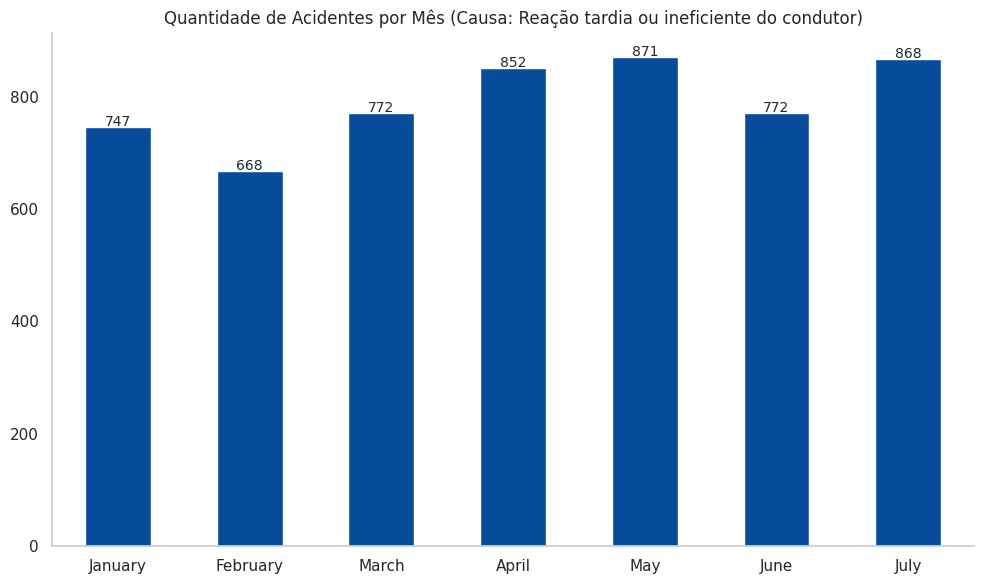

In [17]:
# Criando DataFrame filtrando pela causa "Reação tardia ou ineficiente do condutor"
df_reacao_tardia = df_prf[df_prf['causa_acidente'] == 'Reação tardia ou ineficiente do condutor']

# Contagem de acidentes por mês
contagem_por_mes = df_reacao_tardia['data_inversa'].dt.strftime('%B').value_counts().reindex(calendar.month_name[1:8])

# Criando o gráfico
plt.figure(figsize=(10, 6))
ax = contagem_por_mes.plot(kind='bar', color='#084D9B')
plt.title('Quantidade de Acidentes por Mês (Causa: Reação tardia ou ineficiente do condutor)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Acidentes')

# Adicionando valores nas barras
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, int(bar.get_height()), fontsize=10, ha='center')

plt.xticks(rotation=0)
plt.grid(False)

# Removendo os rótulos nos eixos x e y
ax.set_xlabel('')
ax.set_ylabel('')

# Removendo as bordas superior e direita do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Com base nos dados disponíveis, observamos que não há um padrão claro discernível. Embora haja variações na ocorrência do problema ao longo de diferentes meses, não há informações significativas que possam fornecer insights específicos sobre o fenômeno.

### 4.2 - Estados com o maior numero de acidente


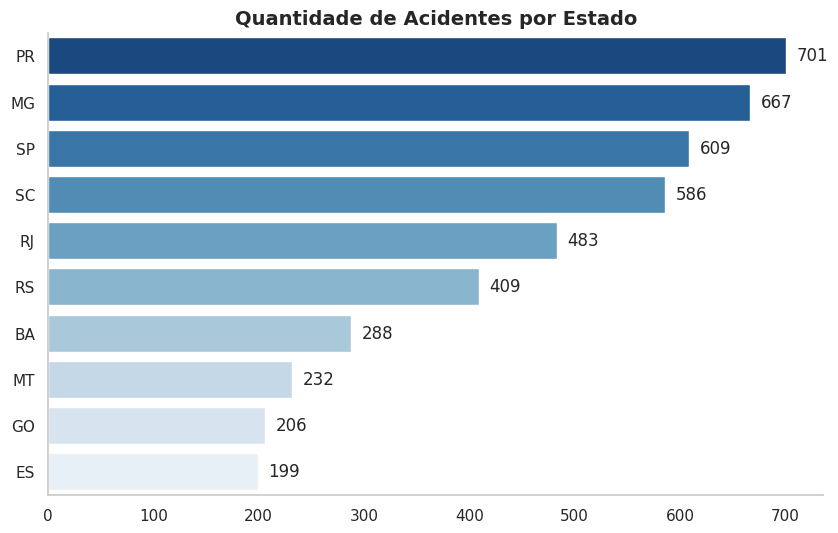

In [18]:
# Agrupando os dados por estado e contando a quantidade de acidentes
uf_graf = df_reacao_tardia.groupby(['uf'])['id'].count().reset_index().rename(columns={'id': 'quantidade_acidentes'}).sort_values(by='quantidade_acidentes', ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Definindo os eixos
ax = sns.barplot(x='quantidade_acidentes', y='uf', data=uf_graf, palette='Blues_r')

# Configurações adicionais do gráfico
plt.title('Quantidade de Acidentes por Estado', fontweight='bold', fontsize=14)
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Removendo os rótulos nos eixos x e y
ax.set_xlabel('')
ax.set_ylabel('')

# Adicionando os valores nas barras
for index, value in enumerate(uf_graf['quantidade_acidentes']):
    plt.text(value + 10, index, str(value), va='center', fontsize=12)

plt.show()


Analisando esses resultados, podemos observar que há seis estados onde o número de acidentes do tipo "Reação tardia ou ineficiente do condutor" é significativamente elevado.

* **Paraná (PR):** O estado do Paraná lidera a lista com 701 acidentes registrados. Isso sugere que é uma região onde a atenção para a segurança viária deve ser prioritária. Pode haver fatores específicos que contribuem para esse alto número, como densidade populacional, infraestrutura viária ou condições climáticas.

* **Minas Gerais (MG):** Minas Gerais está em segundo lugar, com 667 acidentes. Isso destaca que não se trata apenas de uma preocupação localizada, mas sim um problema nacional que requer ações coordenadas.

* **São Paulo (SP):** O estado de São Paulo, altamente urbanizado, também enfrenta um alto número de acidentes, com 609 registrados. Isso pode estar relacionado à densidade de tráfego e à complexidade das vias na região metropolitana de São Paulo.

* **Santa Catarina (SC):** Santa Catarina ocupa a quarta posição, com 586 acidentes. A geografia diversificada do estado, que inclui áreas urbanas e rurais, pode contribuir para essa estatística.

* **Rio de Janeiro (RJ):** O Rio de Janeiro, conhecido por suas condições geográficas desafiadoras, registrou 483 acidentes. As características únicas das estradas cariocas podem influenciar essa estatística.

* **Rio Grande do Sul (RS):** O Rio Grande do Sul aparece em quinto lugar, com 409 acidentes. Novamente, a geografia e as condições climáticas podem desempenhar um papel importante.

Sabendo que esses estados apresentam os maiores volumes de dados, optaremos por considerar apenas esses estados para dar continuidade à nossa análise.

### 4.3 - Observando as maiores causas de

Vamos agora buscar compreender se há alguma causa ou cenário que possa explicar a incidência desses acidentes. Para isso, vamos criar alguns gráficos, concentrando nossa análise apenas nos estados mencionadas anteriormente.

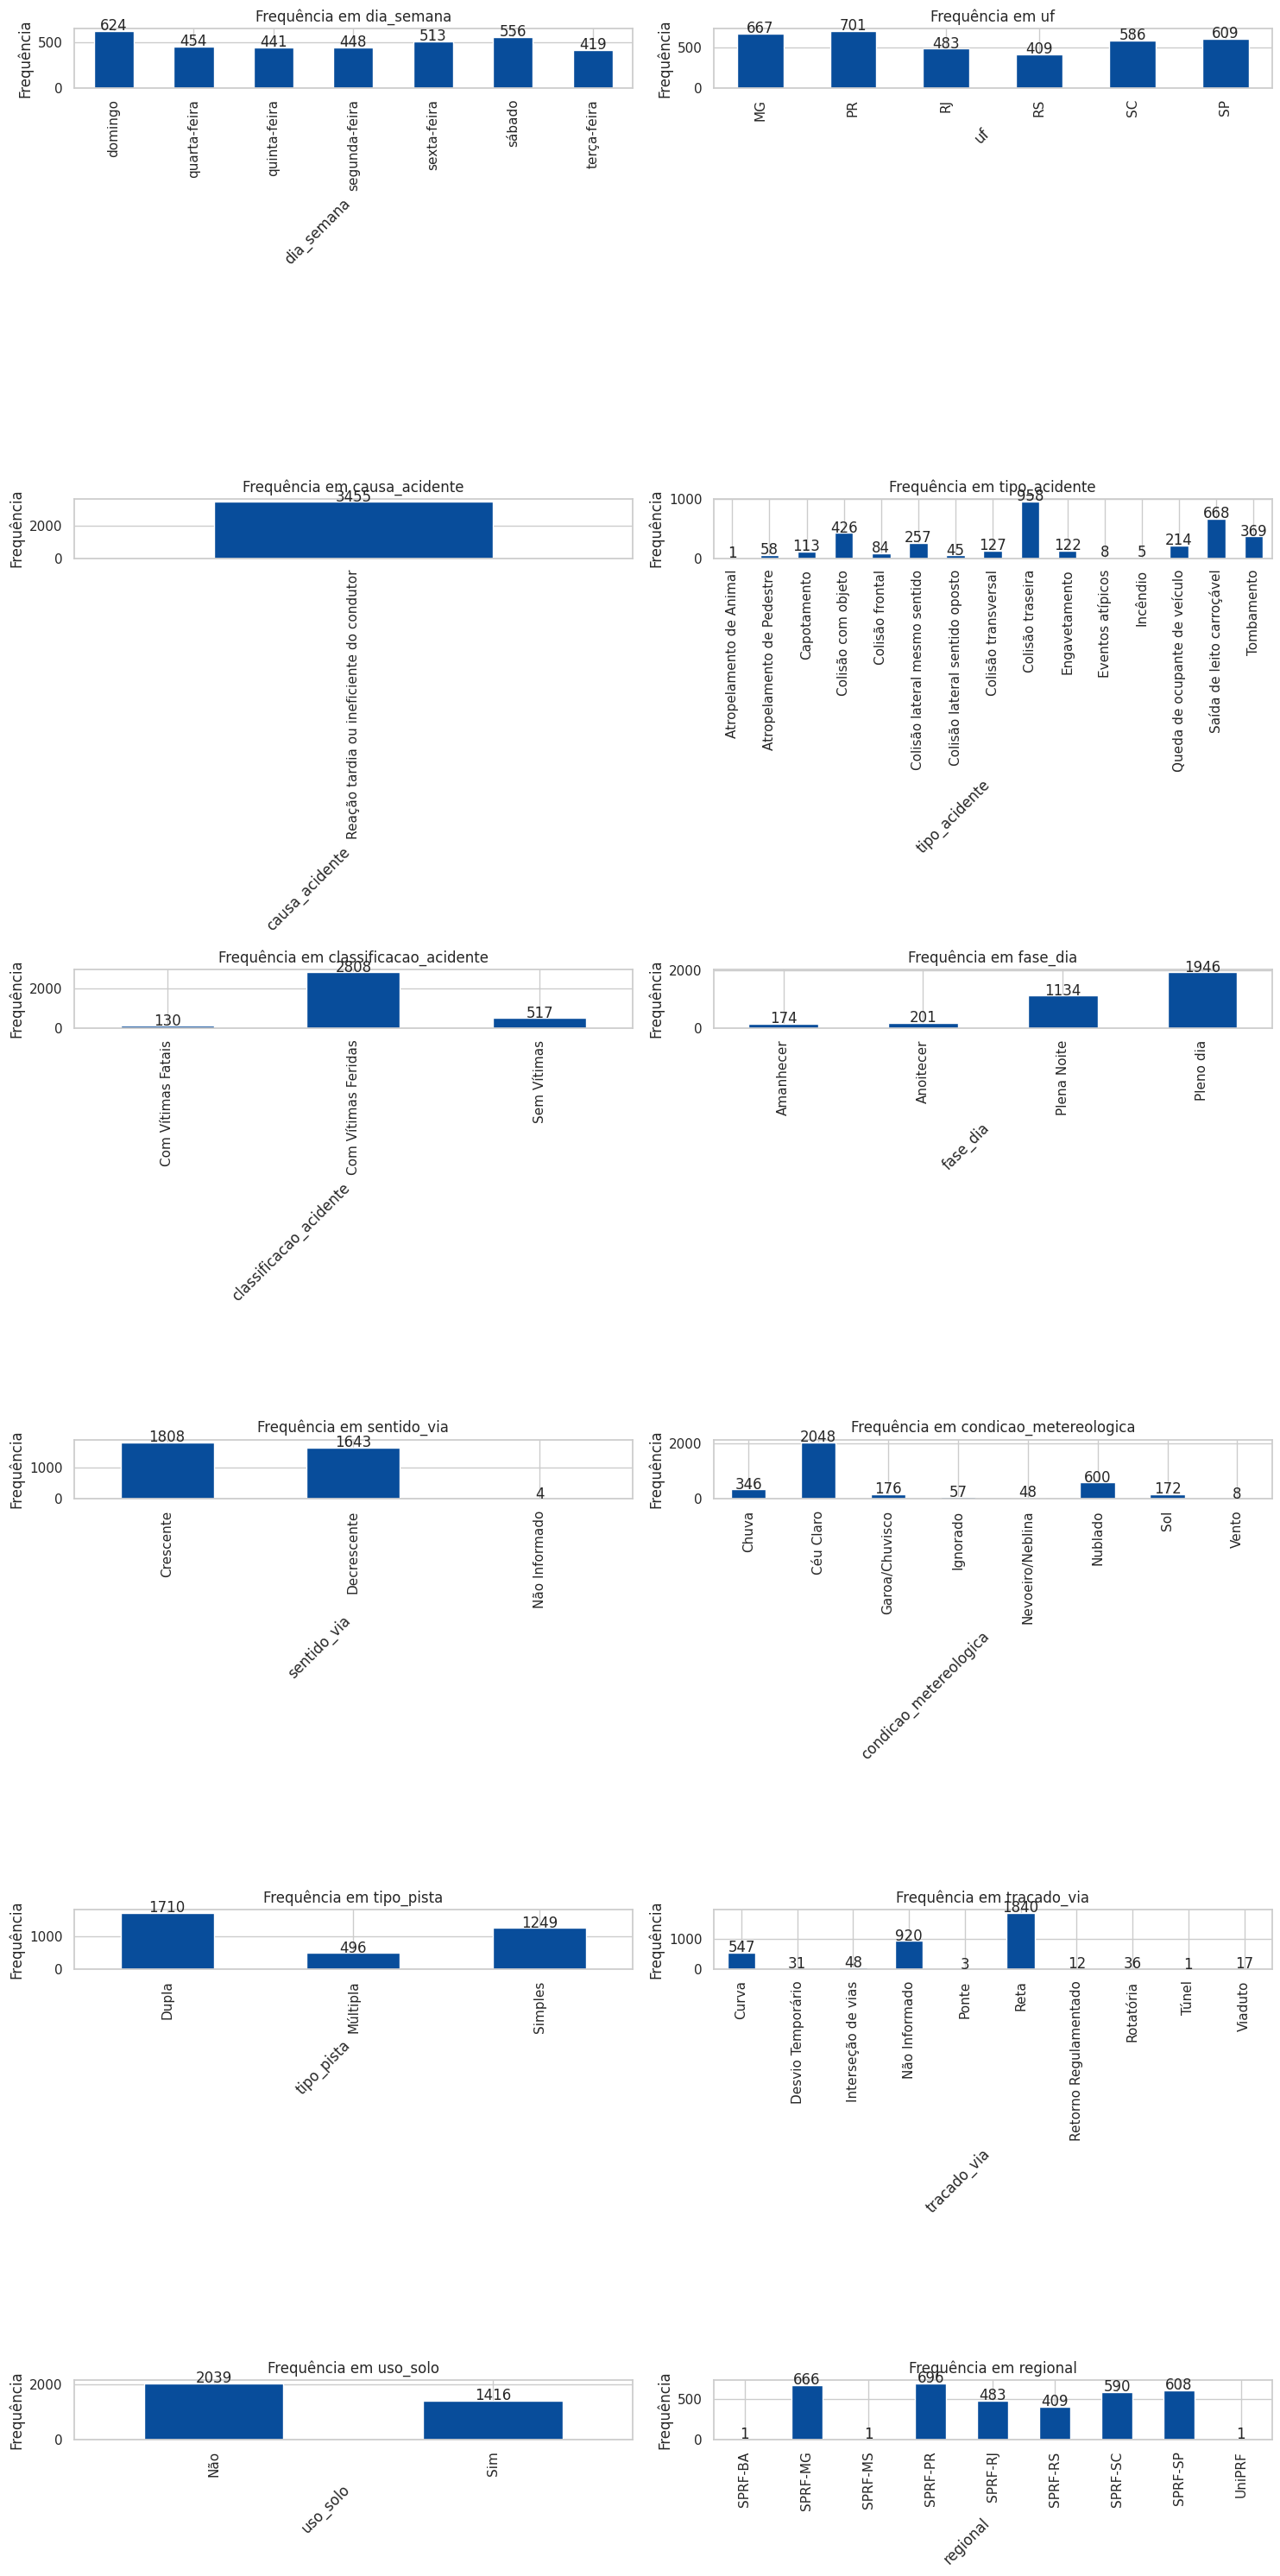

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_categorical_frequency_custom(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame Pandas
        O DataFrame para plotagem.
    - corte_cardinalidade: int, opcional (padrão é 30)
        A cardinalidade máxima para uma coluna ser considerada.
    - graficos_por_linha: int, opcional (padrão é 2)
        A quantidade de gráficos por linha na saída.

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        counts = df[var].value_counts().sort_index()
        counts.plot(kind='bar', ax=ax, color='#084D9B')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var, rotation=45, ha='right')  # Ajusta a rotação dos rótulos

        # Adiciona os números (valores das frequências) acima das barras
        for j, count in enumerate(counts):
            ax.text(j, count + 10, str(count), ha='center')

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

# Filtrar os dados para conter apenas as UFs desejadas
ufs_desejadas = ['PR', 'MG', 'RJ', 'SP', 'SC', 'RS']
df_filtrado_uf = df_reacao_tardia[df_reacao_tardia['uf'].isin(ufs_desejadas)]

plot_categorical_frequency_custom(df_filtrado_uf, corte_cardinalidade=30, graficos_por_linha=2)


**Principais Insights:**

Aqui estão os insights destacados com base em valores mais significativos, lembrando que todas as informações são relevantes, mas estamos priorizando as que possuem números mais expressivos para abordar prontamente os problemas:

**Tipos de Acidentes Frequentes:**
- Colisão traseira
- Saída de leito carroçável

**Estados com ocorrências mais frequentes de "Reação tardia ou ineficiente do condutor":**
- Minas Gerais (MG)
- Paraná (PR)
- Rio de Janeiro (RJ)
- São Paulo (SP)
- Rio Grande do Sul (RS)
- Santa catarina (SC)

**Pessoas feridas:**
* Maioria dos acidentes resulta em pessoas feridas.

**Em qual fase do dia ocorre com mais frequência:**
* Grande parte dos acidentes ocorrem em pleno dia, porém não podemos descartar que em plena noite também temos muitos acidentes.

**Condição meteorológica com mais acidentes:**
* Céu claro

**Tipo de pista com maior frequência de acidentes:**
* Dupla
* Simples

Com essas informações, podemos entender as BRs com mais problemas, o que nos dá uma noção de onde começar a entender e tratar melhor o problema de acordo com o local.


In [20]:
# Agrupar e contar a quantidade de acidentes por 'br'
df_filtrado_uf.groupby(['uf','br'])['id'].count().reset_index().rename(columns={'id': 'quantidade_acidentes'}).sort_values(by='quantidade_acidentes', ascending=False)

,uf,br,quantidade_acidentes
65,SP,116.0,460
56,SC,101.0,365
21,PR,277.0,191
25,PR,376.0,190
13,MG,381.0,180
...,...,...,...
27,PR,469.0,1
15,PR,0.0,1
10,MG,356.0,1
4,MG,146.0,1


Agora, vamos representar esses dados em um mapa para avaliar a distribuição geográfica. No entanto, nossa análise estará focada em áreas onde ocorreram mais de um acidente, isso podera nos dar um alerta de prioridade

In [23]:
import folium
from folium.plugins import HeatMap

# Função para determinar a cor com base na quantidade de acidentes
def determinar_cor(quantidade):
    if quantidade == 2:
        return 'blue'
    elif quantidade == 3:
        return 'purple'
    elif quantidade == 4:
        return 'orange'
    elif quantidade >= 5:
        return 'red'
    else:
        return 'gray'  # Cor padrão para quantidades diferentes

# Agrupando as colunas para plotar o gráfico
contagem_br_lt = df_filtrado_uf.groupby(['uf', 'br', 'latitude', 'longitude'])['id'].count().reset_index().rename(columns={'id': 'quantidade_acidentes'})
contagem_br_lt = pd.DataFrame(contagem_br_lt)
contagem_br_lt.sort_values(by='quantidade_acidentes', ascending=False)

# Filtrando a contagem para onde a quantidade é maior que 1
contagem = contagem_br_lt[contagem_br_lt['quantidade_acidentes'] > 1]

# Criando mapa
map = folium.Map(location=[contagem['latitude'].mean(), contagem['longitude'].mean()], zoom_start=8)

# Preparar dados para o mapa de calor
heat_data = [[row['latitude'], row['longitude'], row['quantidade_acidentes']] for _, row in contagem.iterrows()]

# Adicionando marcadores ao mapa com cores diferentes com base na quantidade de acidentes
for _, row in contagem.iterrows():
    cor = determinar_cor(row['quantidade_acidentes'])
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f'BR: {row["br"]}<br>Acidentes: {row["quantidade_acidentes"]}',
        icon=folium.Icon(color=cor)
    ).add_to(map)

# Adicionar o mapa de calor
HeatMap(heat_data).add_to(map)

# Exibir o mapa com os marcadores e o mapa de calor
display(map)


É possivel identificar áreas onde ocorreram mais de três acidentes, o que pode ser considerado um indicador crítico que requer atenção urgente. A concentração de ocorrências semelhantes em um único local é motivo de preocupação e exige atenção especial. Portanto, dividimos os pontos em diferentes cores, cada uma representando a quantidade de acidentes em um local específico. Observamos que a cor azul predomina no mapa, indicando que a maioria desses pontos registrou dois acidentes no mesmo local.

# Conclusão
Após uma análise detalhada dos acidentes relacionados à "Reação tardia ou ineficiente do condutor" e considerando os números significativos apresentados nos dados, destacamos algumas constatações e sugerimos medidas para reduzir a ocorrência desses acidentes:

* **Campanhas de Conscientização:**
A análise indica que 3.289 acidentes com 2.676 feridos e 129 vítimas fatais devido à "Reação tardia ou ineficiente do condutor" nos estados mais afetados - `'PR', 'MG', 'RJ', 'SP', 'SC', 'RS'`, é fundamental implementar campanhas educativas. Essas campanhas devem enfatizar a responsabilidade dos motoristas no trânsito, promover uma direção defensiva e conscientizar sobre os perigos dessa causa de acidentes. Além disso, é essencial uma fiscalização rigorosa para coibir comportamentos imprudentes.

* **Avaliação de Segurança Viária:**
A análise dos dados permitiu identificar as rodovias (BRs) mais críticas em relação a esses acidentes, como a BR 116 em São Paulo, com 460 ocorrências. Para abordar esses problemas de maneira eficaz, é necessário realizar avaliações detalhadas de segurança viária nessas rodovias, Com o mapa disponibilizado é possivel visualmente validar e entender as vias onde mais de 1 acidente ocorre, pois isso podera nos dar uma visão do que é urgência. Isso possibilitará a identificação de áreas de risco específicas e a implementação de melhorias direcionadas. Com o mapa disponibilizado é possivel visualmente validar e entender as vias onde mais de 1 acidente ocorre.

* **Infraestrutura Viária:**
A qualidade da infraestrutura viária desempenha um papel crucial na segurança nas estradas. A falta de sinalização adequada, estradas em más condições e problemas relacionados à iluminação e condições meteorológicas podem contribuir para acidentes. Portanto, é fundamental investir na melhoria da sinalização em áreas de alto risco, garantir a boa manutenção das estradas, especialmente onde os acidentes são mais frequentes, e assegurar a iluminação adequada durante a noite. Além disso, é essencial implementar sistemas de monitoramento climático e campanhas de conscientização sobre os perigos de dirigir em condições adversas. Essas medidas visam reduzir acidentes relacionados à infraestrutura viária e preservar vidas nas estradas brasileiras.

* **Atenção em Pistas Duplas e Fiscalização Reforçada:**
Os dados revelaram uma alta incidência de acidentes em rodovias de pista dupla, sugerindo a necessidade de fiscalização reforçada. Essas rodovias são propensas a comportamentos de risco, como ultrapassagens perigosas e excesso de velocidade. Portanto, é fundamental intensificar a fiscalização nessas estradas para coibir esses comportamentos imprudentes. A presença policial e a aplicação rigorosa das leis de trânsito podem desencorajar tais práticas perigosas.